# **Ridge Regression**


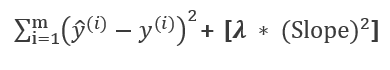

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [5]:
boston = pd.read_csv('Boston.csv')
X=boston.drop('medv',axis=1)
y=boston['medv']

X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=23)

#crating the Ridge model
ridge=Ridge()

ridge.fit(X_train,y_train)
print("Intercept :",ridge.intercept_)
print("Coefficients",ridge.coef_)
y_pred = ridge.predict(X_test)
print("Mean Aquared Error using Ridge Regressor :- ",mean_squared_error(y_test,y_pred))

Intercept : 22.5678841871633
Coefficients [-8.97555444e-02  4.33309223e-02 -5.25081722e-02  3.15074161e+00
 -8.22161546e+00  4.32383590e+00 -6.97277628e-03 -1.27145351e+00
  2.30634640e-01 -7.98015669e-03 -7.81944110e-01  1.47828089e-02
 -5.37220957e-01]
Mean Aquared Error using Ridge Regressor :-  25.647900623108672


**Parameters allow the model to learn the rules from the data while hyperparameters control how the model is training. Parameters learn their own values from data. In contrast, hyperparameters do not learn their values from data. We need to manually specify them before training the model.**


# changing Alpha in Ridge

In [20]:
lst=[0.01,0.1,0.5,1,2,2.5,3]
errors =[]
for i in lst:
    ridge=Ridge(alpha = i)
    ridge.fit(X_train,y_train)
    #print("Intercept :",ridge.intercept_)
    #print("Coefficients",ridge.coef_)
    y_pred = ridge.predict(X_test)
    #print("Mean Aquared Error using Ridge Regressor :- ",mean_squared_error(y_test,y_pred))
    errors.append(mean_squared_error(y_test,y_pred))

print("Best Score :",np.min(errors))
i_min = np.argmin(errors)
print("Best Parameter",lst[i_min])

Best Score : 25.36044416326623
Best Parameter 0.01


# **Lasso Regression**



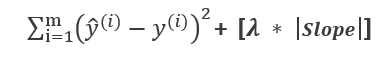

 # Lasso reduces the coefficients of unimportant features to zero.

In [21]:
from sklearn.linear_model import Lasso

#crating the Lasso model
lasso=Lasso()

lasso.fit(X_train,y_train)
print("Intercept :",lasso.intercept_)
print("Coefficients",lasso.coef_)
y_pred = lasso.predict(X_test)
print("Mean Aquared Error using Ridge Regressor :- ",mean_squared_error(y_test,y_pred))

Intercept : 38.86229539512989
Coefficients [-0.05595129  0.05021297 -0.          0.         -0.          0.95347337
  0.01833076 -0.61502965  0.20676156 -0.0113283  -0.70503878  0.01102007
 -0.77357375]
Mean Aquared Error using Ridge Regressor :-  28.888749212797446


In [23]:
lst=[0.01,0.1,0.5,1,2,2.5,3]
errors =[]
for i in lst:
    lasso=Lasso(alpha = i)
    lasso.fit(X_train,y_train)
    #print("Intercept :",lasso.intercept_)
    #print("Coefficients",lasso.coef_)
    y_pred = lasso.predict(X_test)
    #print("Mean Aquared Error using Ridge Regressor :- ",mean_squared_error(y_test,y_pred))
    errors.append(mean_squared_error(y_test,y_pred))

print(errors)
print("Best Score :",np.min(errors))
i_min = np.argmin(errors)
print("Best Parameter",lst[i_min])

[25.39238926240651, 26.027606416428547, 26.028318310307196, 28.888749212797446, 34.844507072693226, 36.29553467631803, 37.72700114143436]
Best Score : 25.39238926240651
Best Parameter 0.01


# **Elastic Net Regression**


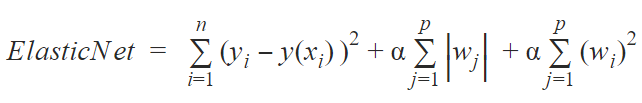

In [24]:
from sklearn.linear_model import ElasticNet

elastic  = ElasticNet()
elastic.fit(X_train,y_train)

y_pred = elastic.predict(X_test)
print(mean_squared_error(y_test,y_pred))

28.34945977955968


In [33]:
l1_rat = [0.1,0.25,0.5,0.8,0.9]
alpha = [0.1,0.5,1,2,2.5,3]
error=dict()

In [41]:
for a in alpha:
    for l in l1_rat:
        elastic = ElasticNet(alpha=a,l1_ratio=l)
        elastic.fit(X_train,y_train)
        y_pred = elastic.predict(X_test)
        #print(mean_squared_error(y_test,y_pred))
        error['alpha : '+str(a)+', l1_ratio : '+str(l)]  = mean_squared_error(y_test,y_pred)

er_pd = pd.Series(error)
er_pd.sort_values()


alpha : 0.1, l1_ratio : 0.1     25.559230
alpha : 0.1, l1_ratio : 0.25    25.592090
alpha : 0.1, l1_ratio : 0.5     25.688603
alpha : 0.1, l1_ratio : 0.8     25.841213
alpha : 0.1, l1_ratio : 0.9     25.923046
alpha : 0.5, l1_ratio : 0.9     26.147785
alpha : 0.5, l1_ratio : 0.8     26.267650
alpha : 0.5, l1_ratio : 0.5     26.540804
alpha : 0.5, l1_ratio : 0.25    26.679782
alpha : 0.5, l1_ratio : 0.1     26.741802
alpha : 1, l1_ratio : 0.1       28.072520
alpha : 1, l1_ratio : 0.25      28.164799
alpha : 1, l1_ratio : 0.5       28.349460
alpha : 1, l1_ratio : 0.8       28.643562
alpha : 1, l1_ratio : 0.9       28.761215
alpha : 2, l1_ratio : 0.1       29.896721
alpha : 2, l1_ratio : 0.25      30.364218
alpha : 2.5, l1_ratio : 0.1     30.612963
alpha : 3, l1_ratio : 0.1       31.252973
alpha : 2.5, l1_ratio : 0.25    31.271473
alpha : 2, l1_ratio : 0.5       31.512857
alpha : 3, l1_ratio : 0.25      32.099091
alpha : 2.5, l1_ratio : 0.5     32.917028
alpha : 2, l1_ratio : 0.8       33

# **According to the “No Free Lunch” theory, there is no one model that works best for every situation. Because the assumptions of a great model for one issue may not hold true for another.**